importing Libraries

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import datetime 
import chardet
import fuzzywuzzy   
from fuzzywuzzy import process

In [26]:
with open(r"C:\Users\ravee\Downloads\Datsets\salesworkload.xlsx",'rb') as file:
    file_name = file.read(10000)
    print("All done")
    print(chardet.detect(file_name))
    

All done
{'encoding': None, 'confidence': 0.0, 'language': None}


    Check the type of encoding

Open file with proper encoder and create dataframe

In [32]:
df = pd.read_excel(r"C:\Users\ravee\Downloads\Datsets\salesworkload.xlsx",header=1)
df.columns

Index(['MonthYear', 'Time index', 'Country', 'StoreID', 'City', 'Dept_ID',
       'Dept. Name', 'HoursOwn', 'HoursLease', 'Sales units', 'Turnover',
       'Customer', 'Area (m2)', 'Opening hours'],
      dtype='object')

1.Check the dataframe shape and properties
2.Create copy of dataframe

In [35]:
df.describe

# sales = df.copy()

<bound method NDFrame.describe of      MonthYear  Time index         Country  StoreID        City  Dept_ID  \
0      10.2016         1.0  United Kingdom  88253.0  London (I)      1.0   
1      10.2016         1.0  United Kingdom  88253.0  London (I)      2.0   
2      10.2016         1.0  United Kingdom  88253.0  London (I)      3.0   
3      10.2016         1.0  United Kingdom  88253.0  London (I)      4.0   
4      10.2016         1.0  United Kingdom  88253.0  London (I)      5.0   
...        ...         ...             ...      ...         ...      ...   
7653   06.2017         9.0          Sweden  29650.0  Gothenburg     12.0   
7654   06.2017         9.0          Sweden  29650.0  Gothenburg     16.0   
7655   06.2017         9.0          Sweden  29650.0  Gothenburg     11.0   
7656   06.2017         9.0          Sweden  29650.0  Gothenburg     17.0   
7657   06.2017         9.0          Sweden  29650.0  Gothenburg     18.0   

               Dept. Name  HoursOwn  HoursLease  Sale

Checking and handling missing datas

In [50]:
sales.isnull().sum()

# sales=sales.drop("Customer",axis=1)
# sales.sample(10)
# null_rows = sales[sales.isnull().any(axis=1)]
# print(null_rows)
sales = sales.dropna()


MonthYear        0
Time index       0
Country          0
StoreID          0
City             0
Dept_ID          0
Dept. Name       0
HoursOwn         0
HoursLease       0
Sales units      0
Turnover         0
Area (m2)        0
Opening hours    0
dtype: int64

Check for duplicates and handle them

In [52]:
sales.duplicated().sum()

0

Parse date to required format and add 2 columns for month and year

In [90]:
# sales["MonthYear"] = pd.to_datetime(sales["MonthYear"],format = '%m.%Y')
# sales.MonthYear
sales["Month"]=sales["MonthYear"].dt.strftime("%B")
# sales["Year"]=sales["MonthYear"].dt.year
sales.Month




0       October
1       October
2       October
3       October
4       October
         ...   
7653       June
7654       June
7655       June
7656       June
7657       June
Name: Month, Length: 7650, dtype: object

Outlier detection and handling


<Axes: >

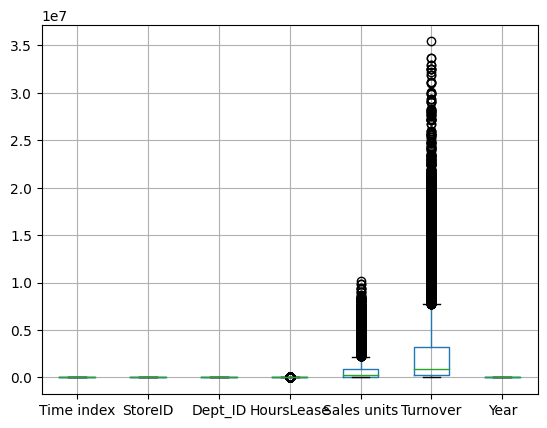

In [121]:
def outlier_detection(dfs,column):
    i25,i75 = np.quantile(dfs[column],[0.25,0.75])
    iqr = i75-i25
    cutoff = 1.5*iqr
    lower,higher = i25-cutoff,i75+cutoff
    outliers = dfs[(dfs[column]<lower)| (dfs[column]>higher)]
    print(max(outliers[column]))

sales.boxplot()
# plt.scatterplot(sales["Turnover"])
# outlier_detection(sales,"Turnover")
# sales = sales[sales["Turnover"]!=42717390.0]

# sales.shape


Check any inconsistencies in data

In [142]:
unique = sorted(sales["Dept. Name"].unique())
print(unique)
# matches = fuzzywuzzy.process.extract("United Kingdom",unique,limit = 5,scorer = fuzzywuzzy.fuzz.token_sort_ratio)
# print(matches)

# def replace_matches(df1,column,string_to_match,min_ratio = 90):
#     unique = df1[column].unique()
#     matches = fuzzywuzzy.process.extract(string_to_match,unique,limit=10,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
#     matching_matches = [matches[0] for matches in matches if matches[1]>=min_ratio]
#     matching_rows = df1[column].isin(matching_matches)
#     df1.loc[matching_rows,column] = string_to_match
#     print("Completed")
# replace_matches(df1=sales,column = "Dept. Name",string_to_match = "others")

# sales["City"] = sales["City"].str.split(n=1).str[0]

['Admin', 'Checkout', 'Clothing', 'Customer Services', 'Delivery', 'Dry', 'Fish', 'Food', 'Frozen', 'Fruits & Vegetables', 'Hardware', 'Household', 'Meat', 'Non Food', 'all', 'others']


Find out the rows to be Normalized and normalize it

In [219]:
# sales.head()
# sns.distplot(sales["Sales units"])
# stand_scaler = StandardScaler()
# sales["Turnover"] = stand_scaler.fit_transform(sales["Turnover"].values.reshape(1,-1))
# sales["Sales units"] = stand_scaler.fit_transform(sales["Sales units"].values.reshape(-1,1))


# sales["HoursOwn"] = stand_scaler.transform(sales["HoursOwn"].values.reshape(-1,1))

# string_row = sales[~sales["HoursOwn"].apply(lambda x: isinstance(x,(int,float)))]
# print (string_row)
# sales = sales.drop(sales.isin(string_row))
# sales = sales[~sales.isin(string_row)]


# sales["Area (m2)"] = stand_scaler.transform(sales["Area (m2)"].values.reshape(-1,1))
# string_row = sales[~sales["Area (m2)"].apply(lambda x: isinstance(x,(int,float)))]
print (sales.loc[6808:6825,"Dept. Name":"Opening hours"])
# df.columns


# print (numeric_check)
# print(sales.shape)



               Dept. Name  HoursOwn  HoursLease  Sales units  Turnover  \
6808                  Dry -0.622590         0.0    -0.425830  0.214809   
6809               Frozen -0.623573         0.0    -0.583091 -0.394121   
6810               others -0.624142         0.0    -0.358877 -0.255400   
6811                 Fish -0.623478         0.0    -0.406581 -0.589262   
6812  Fruits & Vegetables -0.623404         0.0    -0.508239 -0.599228   
6813                 Meat -0.620220         0.0     0.427786  2.653660   
6814                 Food -0.616561         0.0     1.266014  5.018048   
6815             Clothing -0.621914         0.0    -0.519390  0.349063   
6816            Household -0.623304         0.0    -0.590892 -0.360009   
6817             Hardware -0.623042         0.0    -0.584230 -0.351077   
6818             Non Food -0.619922         0.0    -0.446174  0.836494   
6819                Admin -0.622248         0.0    -0.624169 -0.624169   
6820             Checkout -0.621277   

Finished preprocessing